In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Utils import RMSELoss
from sklearn.metrics import r2_score
from collections import defaultdict

/home/grinenko/anaconda3/envs/anna/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
rmse = RMSELoss()
def compute_metrics(y, y_pred, answer=None):
    if answer is None:
        answer = dict()
    answer['rmse'] = rmse(y_pred, y)
    answer['r2'] = r2_score(y, y_pred)
    answer['mae'] = np.mean(np.abs(y - y_pred))
    return answer


def visualize_subplots(data):
    plt.figure(figsize=(8 * (2 if len(MODES) >= 2 else 1), 6 * (2 if len(MODES) >= 3 else 1)))
    xy = {1:(1, 1), 2: (1, 2), 3: (2, 2)} 
    x, y = xy[len(MODES)]
    title = ['TRAIN', "VALID", "TEST"]
    for i, mode in enumerate(MODES):
        plt.subplot(x, y, i + 1)
        y_true = data.loc[data['mode'] == mode]['y'].to_numpy()
        y_pred = data.loc[data['mode'] == mode]['y_pred'].to_numpy()
        metrics = compute_metrics(y_true, y_pred)
        print(title[mode], metrics)
        plt.title(f"{title[mode]}: RMSE {metrics['rmse']:.2f}, R2 {metrics['r2']:.2f}")
        plt.plot(y_true, label="true")
        plt.plot(y_pred, label="pred")
        plt.legend()
    plt.plot()
    plt.show()

def reduce(metrics):
    answer = defaultdict(float)
    for m in metrics:
        for (key, value) in m.items():
            answer[key] += value
    for key in answer.keys():
        answer[key] /= len(metrics)
    return answer

In [4]:
# PATH = 'baseline_results/table_{0}_{1}---try.csv'
PATH = 'baseline_results/table_{0}_{1}---try3.csv'
# PATH = 'gan_results/table_{0}-1.csv'

MODES = [0, 1, 2]
#0 TRAIN, 1 VALID, 2 TEST

SOFT_SENSOR_INDEX = 2
folds = 3
CV = range(folds)
# CV = [""]


In [5]:
metrics = []
for fold in CV:
    data = pd.read_csv(PATH.format(SOFT_SENSOR_INDEX, fold))
    y_true = data.loc[data['mode'] == 2]['y'].to_numpy()
    y_pred = data.loc[data['mode'] == 2]['y_pred'].to_numpy()
    metrics.append(compute_metrics(y_true, y_pred))
reduce(metrics)

defaultdict(float,
            {'rmse': tensor(1.0682),
             'r2': 0.1892635079127867,
             'mae': 0.870810582639581})

TRAIN {'rmse': tensor(0.7029), 'r2': 0.6203068873756874, 'mae': 0.5233043619131638}
VALID {'rmse': tensor(0.9197), 'r2': 0.25884831361473615, 'mae': 0.7598007448649002}
TEST {'rmse': tensor(1.1420), 'r2': 0.2186963525911435, 'mae': 0.9638123383102245}


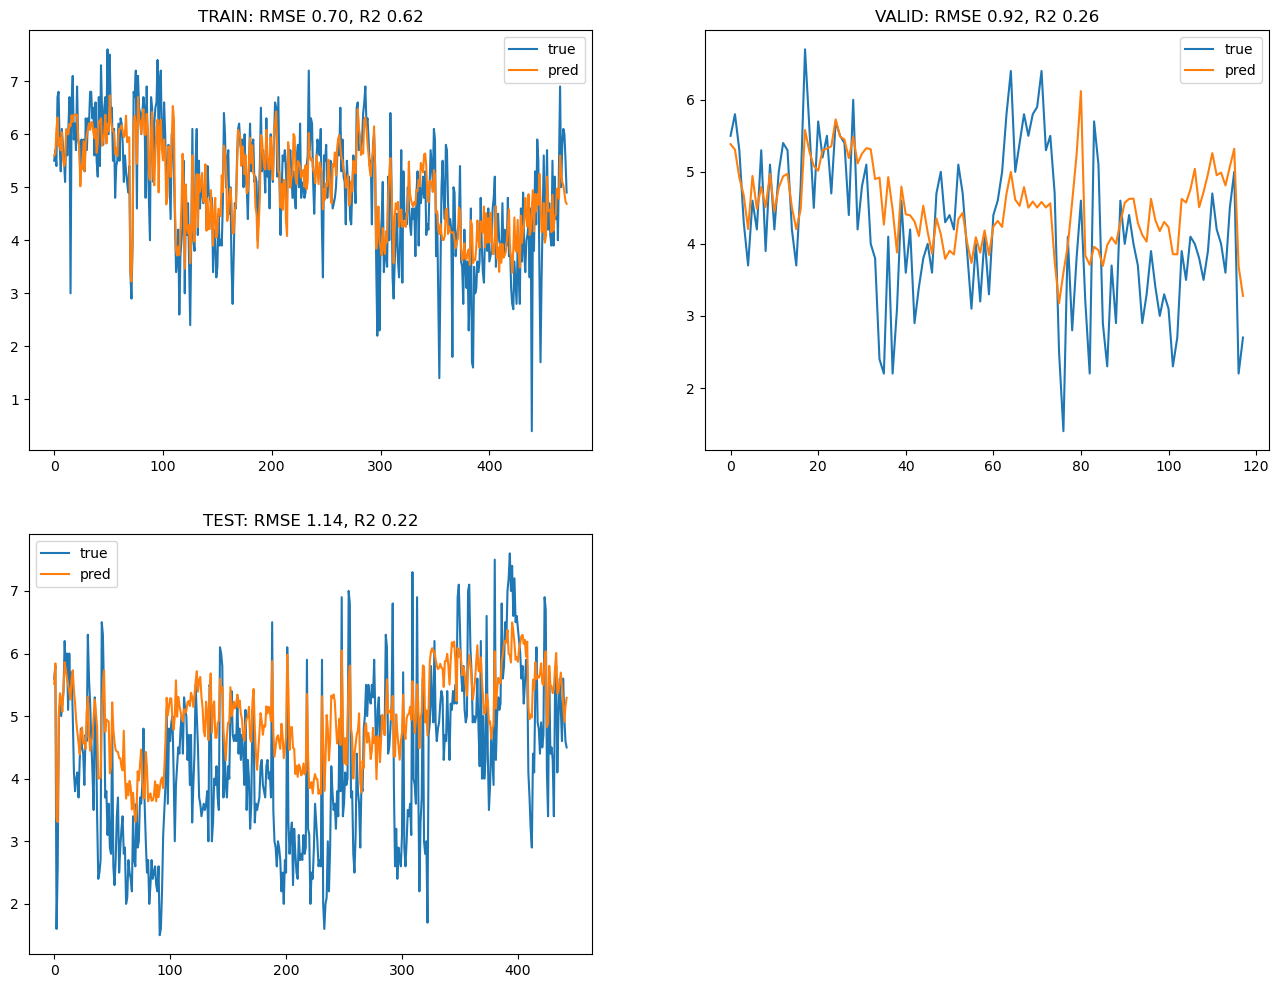

TRAIN {'rmse': tensor(0.3541), 'r2': 0.8930033104325302, 'mae': 0.2608588522773678}
VALID {'rmse': tensor(0.6969), 'r2': 0.5856034442318117, 'mae': 0.5313607672513542}
TEST {'rmse': tensor(0.8610), 'r2': 0.5922667884407973, 'mae': 0.6600794725439619}


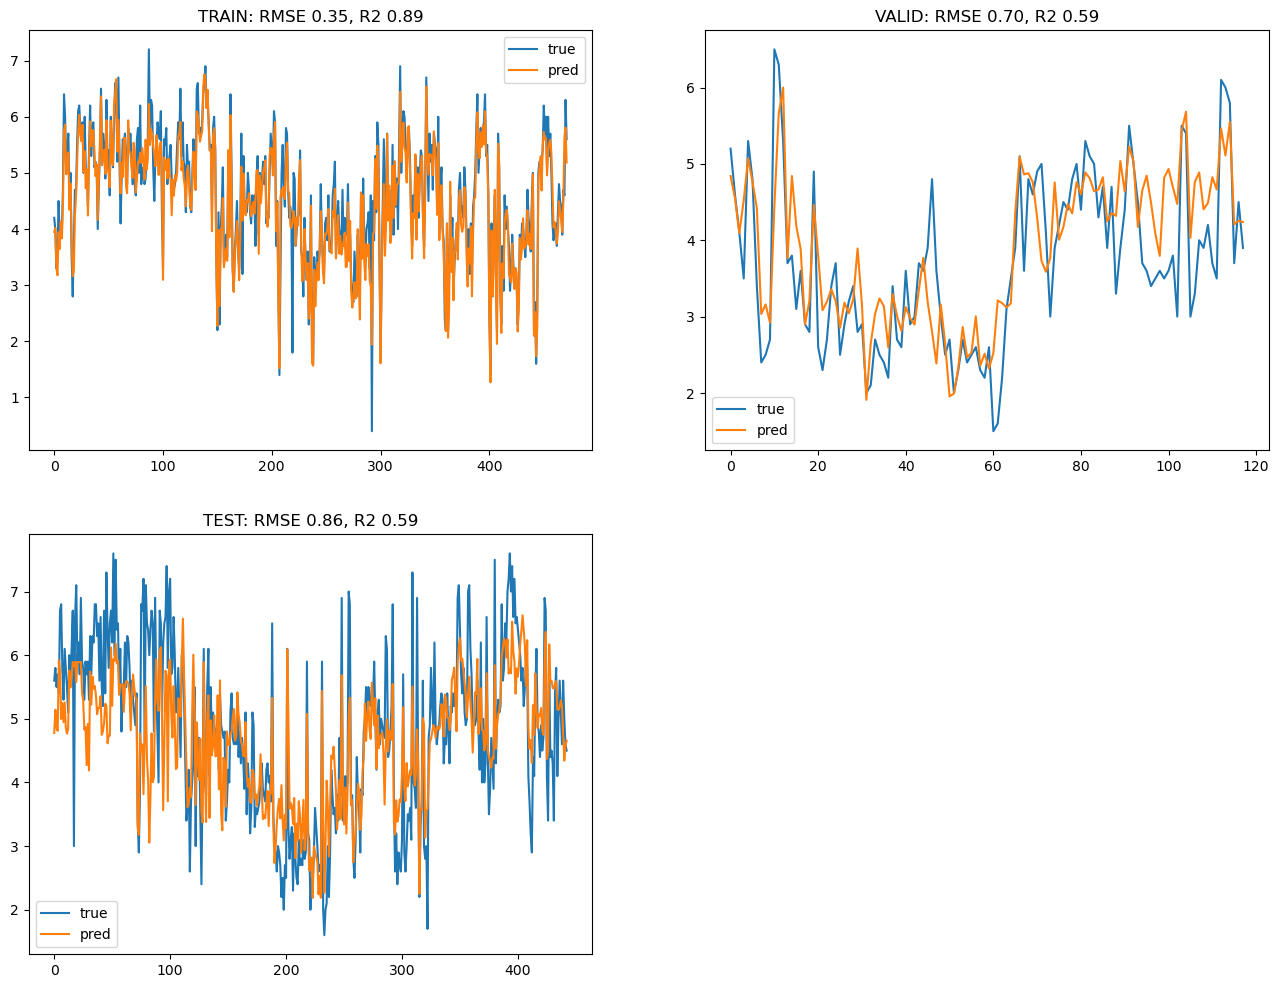

TRAIN {'rmse': tensor(0.4396), 'r2': 0.8294714065753007, 'mae': 0.3162481733297897}
VALID {'rmse': tensor(0.6757), 'r2': 0.7024799085404064, 'mae': 0.5157724057213734}
TEST {'rmse': tensor(1.2016), 'r2': -0.24317261729358064, 'mae': 0.9885399370645562}


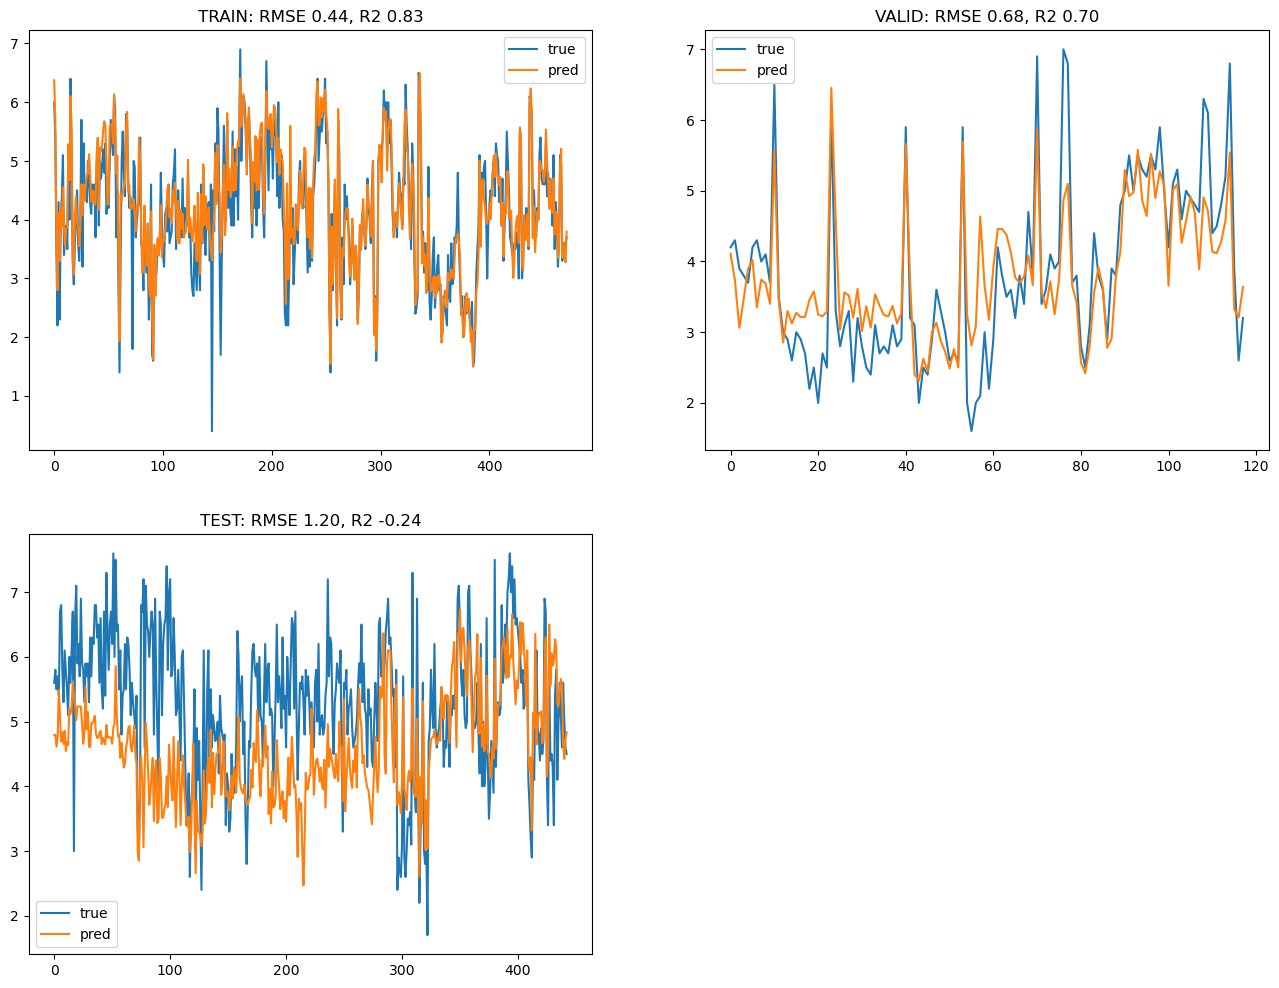

In [6]:
for fold in CV:
    data = pd.read_csv(PATH.format(SOFT_SENSOR_INDEX, fold))
    visualize_subplots(data)

In [7]:
reduce(metrics)

defaultdict(float,
            {'rmse': tensor(1.0682),
             'r2': 0.1892635079127867,
             'mae': 0.870810582639581})

TRAIN {'rmse': tensor(0.4396), 'r2': 0.8294714065753007, 'mae': 0.3162481733297897}
VALID {'rmse': tensor(0.6757), 'r2': 0.7024799085404064, 'mae': 0.5157724057213734}
TEST {'rmse': tensor(1.2016), 'r2': -0.24317261729358064, 'mae': 0.9885399370645562}


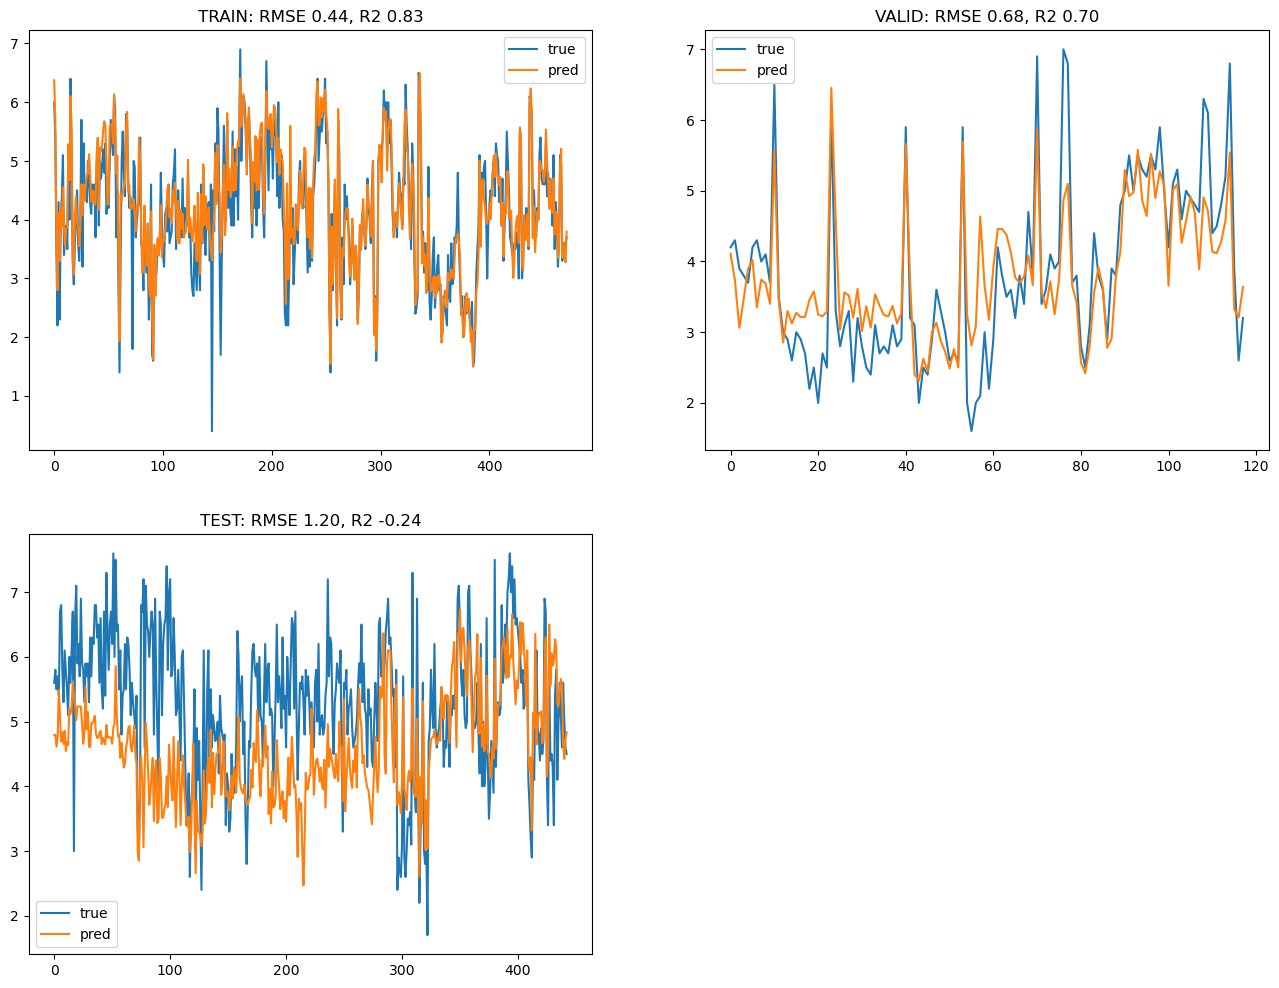

In [8]:
visualize_subplots(data)